<a href="https://colab.research.google.com/github/Robotmcgregor/earth-analytics-python-env/blob/master/3__into_Ratser_Data_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 3. INTRODUCTION TO RASTER DATA IN PYTHON
 CHAPTER 4 INTRO TO RASTER DATA IN PYTHON

# Earth Data Analytics Online Certificate

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python/

In [2]:
# import packages
import os
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
#install the necessary modules
pip install geopandas
pip install rasterio
pip install earthpy

SyntaxError: ignored

In [7]:
pip install rasterio

     |████████████████████████████████| 18.2MB 1.4MB/s 


In [11]:
pip install earthpy

     |████████████████████████████████| 1.4MB 2.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365087 sha256=e934f41225fdc0bf64498ea298853a5c31ae9529236580fe4aba9352faaa05a7
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [15]:
#import spatial analysis packages
import geopandas as gdp
import rasterio as rio
from rasterio.plot import plotting_extent

import earthpy as et
import earthpy.plot as ep

#presets
sns.set(font_scale=1.5, style="white")


In [30]:
path = ("/content/drive/My Drive/earth-analytics/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif")

In [31]:
#create a Numpy array 
with rio.open(path) as dem_src:
  dtm_re_arr = dem_src.read(1)

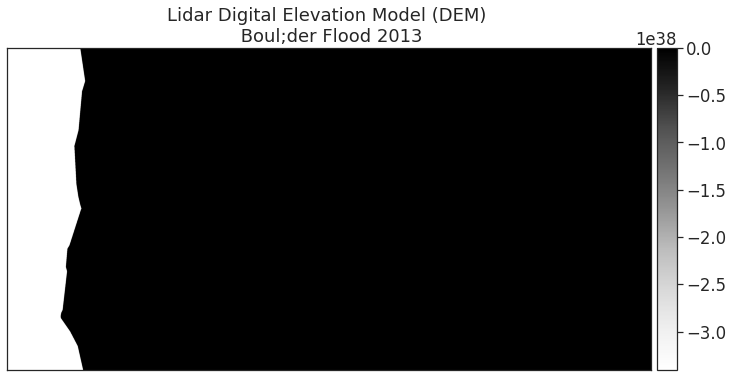

In [32]:
#plot the data
ep.plot_bands(dtm_re_arr,
              title="Lidar Digital Elevation Model (DEM) \n Boul;der Flood 2013",
              cmap="Greys")

In [25]:
#check the min max values as teh elevation apears incorect
print("min value: ", dtm_re_arr.min())
print("Max value: ", dtm_re_arr.max())

min value:  -3.4028235e+38
Max value:  2087.43


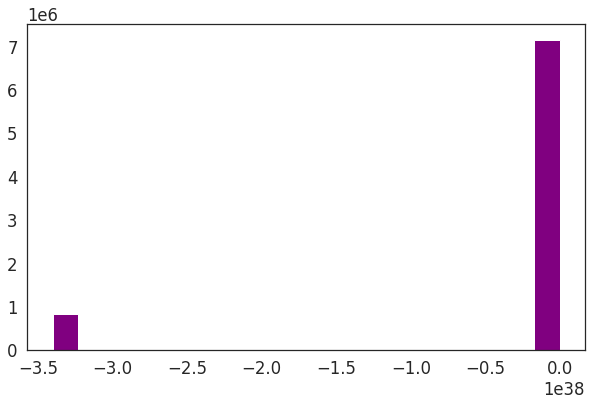

In [28]:
ep.hist(dtm_re_arr,
        figsize=(10,6))
plt.show()

Looking at the minimum value of the data, there is one of two things going on that need to be fixed.


1.   there may be no data values in the data with a negative value that are skewing your plot colors
2.   there also could be outlier data in your raster.

In [33]:
# Read in your data and mask the no data values
with rio.open(path) as dem_src:
    # Masked=True will mask all no data values
    dtm_pre_arr = dem_src.read(1, masked=True)

In [35]:
#check the min max values as teh elevation apears incorect
print("min value: ", dtm_pre_arr.min())
print("Max value: ", dtm_pre_arr.max())

min value:  1676.21
Max value:  2087.43


Notice that now the minimum value looks more like an elevation value (which should most often not be negative).

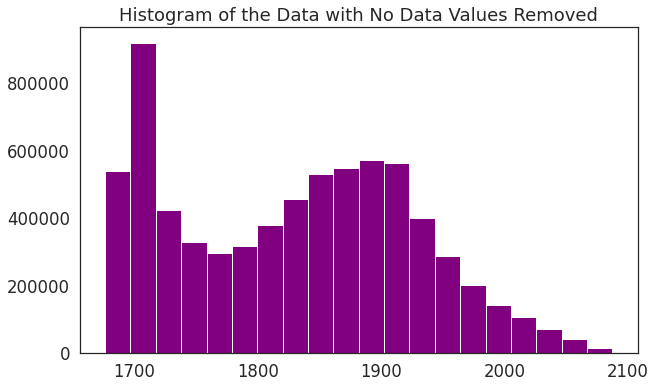

In [36]:
# A histogram can also be helpful to look at the range of values in your data
ep.hist(dtm_pre_arr,
       figsize=(10,6),
       title="Histogram of the Data with No Data Values Removed")
plt.show()

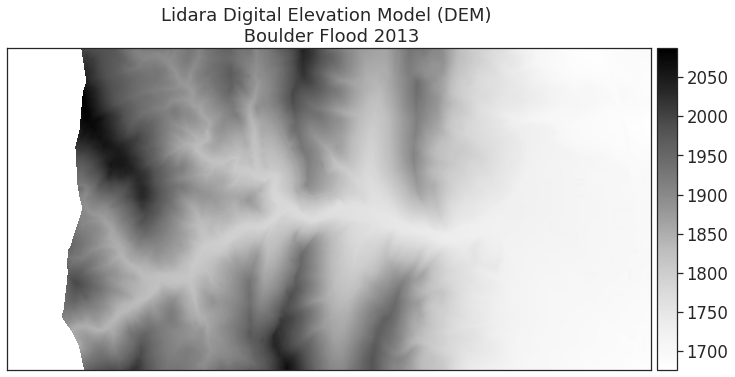

In [38]:
ep.plot_bands(dtm_pre_arr,
              title="Lidara Digital Elevation Model (DEM) \n Boulder Flood 2013",
              cmap="Greys")
plt.show()

In [40]:
with rio.open(path) as dem_src:
  lidar_dem_im = dem_src.read(1, masked = True)
  print("Numpy shape: ", lidar_dem_im.shape)
  print("Objecttype: ", type(lidar_dem_im))

Numpy shape:  (2000, 4000)
Objecttype:  <class 'numpy.ma.core.MaskedArray'>


A numpy array does not by default store spatial information. However, your raster data is spatial - it represents a location on the earth’s surface.

You can acccess the spatial metadata within the context manager using dem_src.profile. Notice that the .profile object contains information including the no data values for your data, the shape, the file type and even the coordinate reference system.

In [45]:
with rio.open(path) as dem_src:
  lidar_dem_meta = dem_src.read(1, masked=True)
  #create an object to store meadata
  lidar_dem_meta = dem_src.profile

print(lidar_dem_meta)  

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_epsg(32613), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


## Plot Raster and Vector Data Together: Plot Extents

In [47]:
boundary_path = ("/content/drive/My Drive/earth-analytics/colorado-flood/spatial/boulder-leehill-rd/clip-extent.shp")